<font color='grey'>Glòria T. Ibars - Data Science</font>


# CHRISTINE LAGARDE | FEMHACK DATA SCIENCE CHALLENGE

The <font color='blue'>European Union</font> is concerned about the implications that **Brexit** may have on the **European economy** and needs to analyse the situation in order to **improve their future decision making**. 
- The main objective is to **estimate the valuation of the european currency with that of the pound sterling going**. 

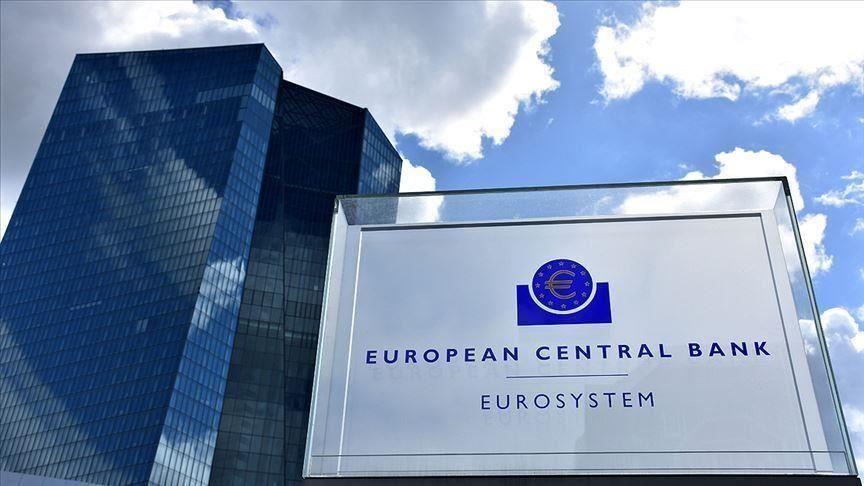



To do this, the first step needed is an **exploratory data analysis (EDA)** for **showing the insights** of the dataset. After understanding the data we will be able to proceed to the next steps and focus on the predictive model that will estimate the valuation price.

# TASK1: EDA | Exploratory Data Analysis

Some notes about the dataset: 

- **Currency pair**: dyadic quotation of the relative value of a currency unit against the unit of another currency in the foreign exchange market
- The dataset goes has the historical prices from January 3rd 2000 to October 29th 2019 on a weekly timeframe.

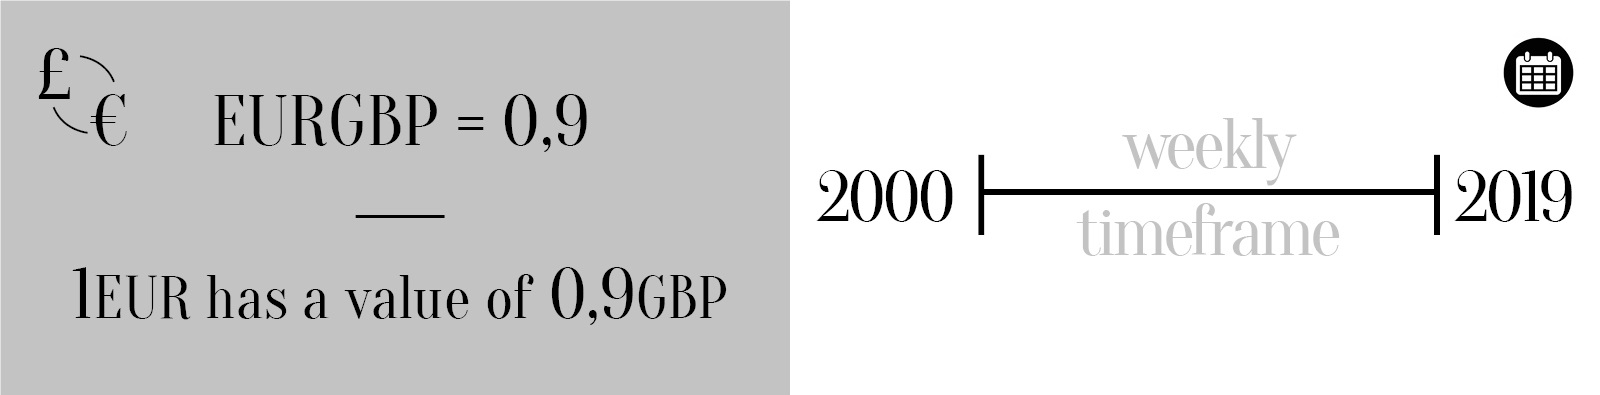

- These are the predictive variables of the dataset:

| Predictive variables | Description |
| --- | --- | 
| Open | Price of the pair at the beginning of the day |
| High | Price of the pair at the beginning of the day |
| Low | Maximum price that the pair reaches during the week |
| Close | Minimum price that the pair reaches during the week |
| rsi | Price of the pair at the end of the week |
| High | Relative Strength Index,shows the strength of the price 
| ema_fast | Exponential Moving Average taking the average value of 14 weeks |
| ema_slow | Exponential Moving Average taking the average value of 42 weeks |
| volatility | Volatility is a measure of the intensity of changes in the price of an asset |



*Moving averages*: are usually used to detect trends in the markets, when the fast moving average (ema_fast) exceeds the slow moving average (ema_slow) indicates the beginning of an uptrend.

*Volatility*: In this case the volatility has been obtained from the NATR (Normalized Average True Range)


## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import math # floor
import scipy.stats as st
import statistics as stats

# don't show annoying warnings 
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

## Import the data

In [2]:
# read the file: the file is in csv format separated by semmicolon so we have to specify it
df=pd.read_csv('data_individual_challenge.csv', sep = ';')

In [3]:
# show the dataframe head
df.head()

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
0,2000-01-03,0.6281,633.00000,0.6235,0.6272,NaN,NaN,NaN,NaN
1,2000-01-10,0.6271,629.00000,0.6181,0.6197,NaN,NaN,NaN,NaN
2,2000-01-17,0.6200,0.62250,0.6072,609.0000,NaN,NaN,NaN,NaN
3,2000-01-24,0.6091,0.61271,599.0000,0.6027,NaN,NaN,NaN,NaN
4,2000-01-31,0.6021,0.62670,598.0000,0.6158,NaN,NaN,NaN,NaN


- It is strange that the last columns have all head values in NAN
- If we show the last rows we can see that the column does contain values in some rows, however we will revisit deeper the NaNs later

In [4]:
# show the df tail
df.tail() 

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
1030,2019-09-30,0.89002,0.89365,0.88333,0.88779,47.151897,0.895761,0.889108,1.564625
1031,2019-10-07,0.89050,0.90183,0.86835,0.86835,37.551961,0.892106,0.888143,1.760791
1032,2019-10-14,0.87443,0.88081,0.85808,0.86451,35.993098,0.888426,0.887044,1.830085
1033,2019-10-21,0.86453,0.86687,0.85770,0.86380,35.698024,0.885143,0.885962,1.776589
1034,2019-10-28,0.86390,0.86520,0.85958,0.86280,35.259578,0.882164,0.884885,1.698128


In [5]:
# show the dataframe shape
df.shape

(1035, 9)

In [6]:
# show the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1035 non-null   object 
 1   Open        1035 non-null   float64
 2   High        1035 non-null   float64
 3   Low         1035 non-null   float64
 4   Close       1035 non-null   float64
 5   rsi         1021 non-null   float64
 6   ema_fast    1022 non-null   float64
 7   ema_slow    994 non-null    float64
 8   volatility  1021 non-null   float64
dtypes: float64(8), object(1)
memory usage: 72.9+ KB


- The dataset is made up of 1035 observations and 9 variables
- The last four columns (rsi, ema_fast, ema_slow and volatility) contain nulls among their values 
- Almost all variables are float numbers except for the first one (date)

## Standardize header names


In [7]:
# show header names
df.columns.to_list()

['Date',
 'Open',
 'High',
 'Low',
 'Close',
 'rsi',
 'ema_fast',
 'ema_slow',
 'volatility']

In [8]:
# apparently there are no spaces but just in case we we are visualy missing some errors, we can replace the spaces with underscores
def standardize_col(col):
    return col.lower().replace(" ","_")


In [9]:
new_cols=[]
for col in df.columns:
    new_cols.append(standardize_col(col))

In [10]:
new_cols

['date',
 'open',
 'high',
 'low',
 'close',
 'rsi',
 'ema_fast',
 'ema_slow',
 'volatility']

In [11]:
df.columns=new_cols

In [12]:
# check that headers have been correctly standardize
df.head()

,date,open,high,low,close,rsi,ema_fast,ema_slow,volatility
0,2000-01-03,0.6281,633.00000,0.6235,0.6272,NaN,NaN,NaN,NaN
1,2000-01-10,0.6271,629.00000,0.6181,0.6197,NaN,NaN,NaN,NaN
2,2000-01-17,0.6200,0.62250,0.6072,609.0000,NaN,NaN,NaN,NaN
3,2000-01-24,0.6091,0.61271,599.0000,0.6027,NaN,NaN,NaN,NaN
4,2000-01-31,0.6021,0.62670,598.0000,0.6158,NaN,NaN,NaN,NaN


## Categorical and numerical columns

In [13]:
# show numerical columns
df_numerical=df.select_dtypes(np.number)
df_numerical

,open,high,low,close,rsi,ema_fast,ema_slow,volatility
0,0.62810,633.00000,0.62350,0.62720,NaN,NaN,NaN,NaN
1,0.62710,629.00000,0.61810,0.61970,NaN,NaN,NaN,NaN
2,0.62000,0.62250,0.60720,609.00000,NaN,NaN,NaN,NaN
3,0.60910,0.61271,599.00000,0.60270,NaN,NaN,NaN,NaN
4,0.60210,0.62670,598.00000,0.61580,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1030,0.89002,0.89365,0.88333,0.88779,47.151897,0.895761,0.889108,1.564625
1031,0.89050,0.90183,0.86835,0.86835,37.551961,0.892106,0.888143,1.760791
1032,0.87443,0.88081,0.85808,0.86451,35.993098,0.888426,0.887044,1.830085
1033,0.86453,0.86687,0.85770,0.86380,35.698024,0.885143,0.885962,1.776589


In [14]:
# show categorical columns
df_categorical=df.select_dtypes(include='object')
df_categorical

,date
0,2000-01-03
1,2000-01-10
2,2000-01-17
3,2000-01-24
4,2000-01-31
...,...
1030,2019-09-30
1031,2019-10-07
1032,2019-10-14
1033,2019-10-21


In [15]:
# change date from object to date type
df["date"]=pd.to_datetime(df["date"], errors="coerce")
df.tail()

,date,open,high,low,close,rsi,ema_fast,ema_slow,volatility
1030,2019-09-30,0.89002,0.89365,0.88333,0.88779,47.151897,0.895761,0.889108,1.564625
1031,2019-10-07,0.89050,0.90183,0.86835,0.86835,37.551961,0.892106,0.888143,1.760791
1032,2019-10-14,0.87443,0.88081,0.85808,0.86451,35.993098,0.888426,0.887044,1.830085
1033,2019-10-21,0.86453,0.86687,0.85770,0.86380,35.698024,0.885143,0.885962,1.776589
1034,2019-10-28,0.86390,0.86520,0.85958,0.86280,35.259578,0.882164,0.884885,1.698128


## NaN values

In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
# quick check if a column contains NaN's  
df.isna().any()

date          False
open          False
high          False
low           False
close         False
rsi            True
ema_fast       True
ema_slow       True
volatility     True
dtype: bool

In [18]:
# if a column has NaNs, check how many NaN's x column
df.isnull().sum()

date           0
open           0
high           0
low            0
close          0
rsi           14
ema_fast      13
ema_slow      41
volatility    14
dtype: int64

In [19]:
# create a nulls snapshot table to see the proportion of nulls for each variable
df.isna().all(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1030    False
1031    False
1032    False
1033    False
1034    False
Length: 1035, dtype: bool

In [20]:
# nulls snapshot table frame
nullsdf = pd.DataFrame(round(df.isna().sum()/len(df),4)*100)

In [21]:
nullsdf = nullsdf.rename(columns={'index':'header',0:'nans_proportion'})

In [22]:
nullsdf

,nans_proportion
date,0.00
open,0.00
high,0.00
low,0.00
close,0.00
rsi,1.35
ema_fast,1.26
ema_slow,3.96
volatility,1.35


In [23]:
# another way of visualising the percentage of missing values
for var in df.columns:
    if df[var].isnull().sum()>0:
        print(var, ": ", round(df[var].isnull().mean(),4))

rsi :  0.0135
ema_fast :  0.0126
ema_slow :  0.0396
volatility :  0.0135


If we want to fill the NaNs with the mean we can do it following the these steps:
- rsi_mean = df["rsi"].mean()
- df['rsi'] = df['rsi'].fillna(rsi_mean)

In [24]:
df[df['ema_slow'].isna()==True]

,date,open,high,low,close,rsi,ema_fast,ema_slow,volatility
0,2000-01-03,0.6281,633.00000,0.6235,0.6272,NaN,NaN,NaN,NaN
1,2000-01-10,0.6271,629.00000,0.6181,0.6197,NaN,NaN,NaN,NaN
2,2000-01-17,0.6200,0.62250,0.6072,609.0000,NaN,NaN,NaN,NaN
3,2000-01-24,0.6091,0.61271,599.0000,0.6027,NaN,NaN,NaN,NaN
4,2000-01-31,0.6021,0.62670,598.0000,0.6158,NaN,NaN,NaN,NaN
5,2000-02-07,0.6166,0.62090,0.6102,0.6192,NaN,NaN,NaN,NaN
6,2000-02-14,0.6192,0.62320,0.6117,0.6157,NaN,NaN,NaN,NaN
7,2000-02-21,0.6161,0.62650,0.6100,0.6114,NaN,NaN,NaN,NaN
8,2000-02-28,0.6117,0.61740,0.5929,606.0000,NaN,NaN,NaN,NaN
9,2000-03-06,0.6059,0.61320,602.0000,0.6102,NaN,NaN,NaN,NaN


The number of nulls is not too large. We can deal with this situation in different ways:
- drop
- replace with the average of the column
- if we have the data available, see if it can be automated to calculate it

In [25]:
df

,date,open,high,low,close,rsi,ema_fast,ema_slow,volatility
0,2000-01-03,0.62810,633.00000,0.62350,0.62720,NaN,NaN,NaN,NaN
1,2000-01-10,0.62710,629.00000,0.61810,0.61970,NaN,NaN,NaN,NaN
2,2000-01-17,0.62000,0.62250,0.60720,609.00000,NaN,NaN,NaN,NaN
3,2000-01-24,0.60910,0.61271,599.00000,0.60270,NaN,NaN,NaN,NaN
4,2000-01-31,0.60210,0.62670,598.00000,0.61580,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1030,2019-09-30,0.89002,0.89365,0.88333,0.88779,47.151897,0.895761,0.889108,1.564625
1031,2019-10-07,0.89050,0.90183,0.86835,0.86835,37.551961,0.892106,0.888143,1.760791
1032,2019-10-14,0.87443,0.88081,0.85808,0.86451,35.993098,0.888426,0.887044,1.830085
1033,2019-10-21,0.86453,0.86687,0.85770,0.86380,35.698024,0.885143,0.885962,1.776589


- We can see that there are numbers above the 1, are these mistakes or very strange outliers? they look like typo mistakes. 

## Managing typo mistakes and outliers

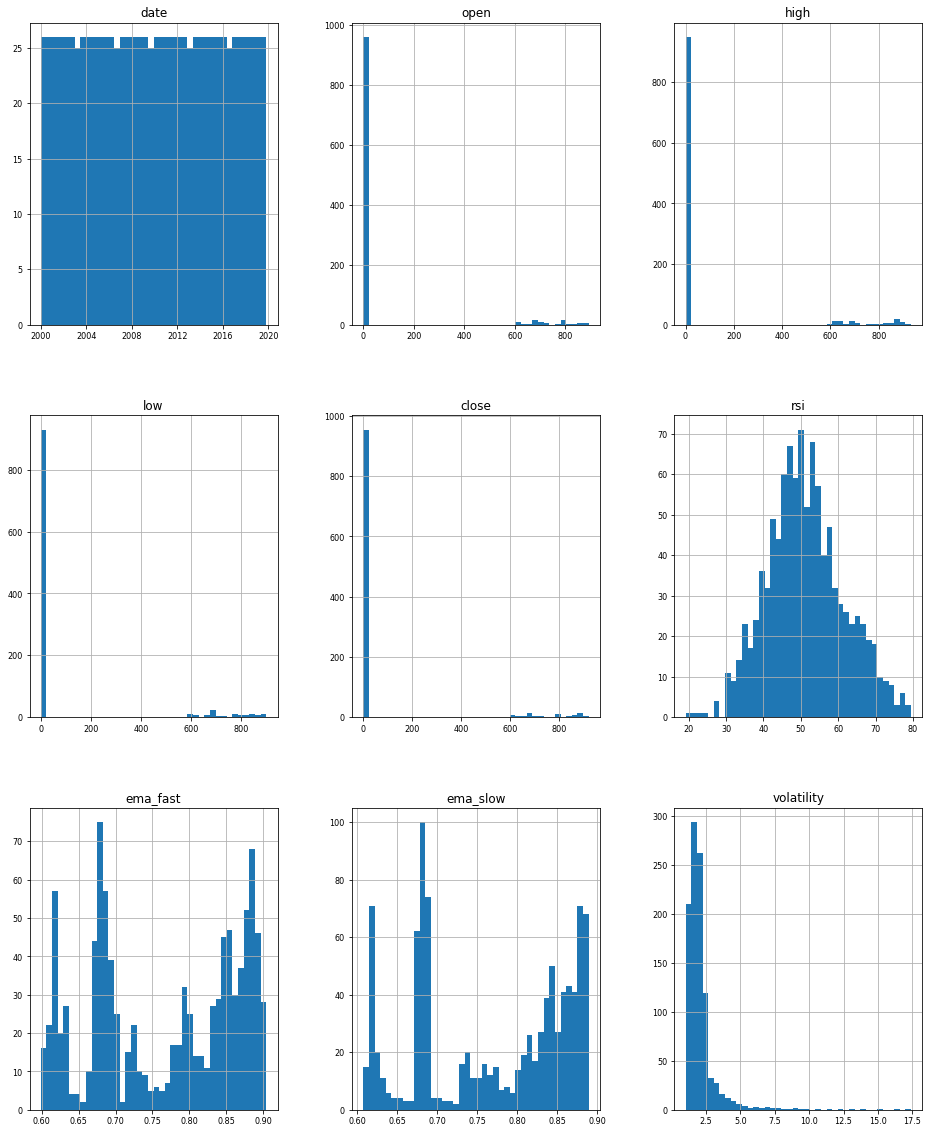

In [26]:
df.hist(figsize=(16, 20), bins=40, xlabelsize=8, ylabelsize=8);

In [27]:
# describe df
df.describe()

,open,high,low,close,rsi,ema_fast,ema_slow,volatility
count,1035.000000,1035.000000,1035.000000,1035.000000,1021.000000,1022.000000,994.000000,1021.000000
mean,54.802227,62.775776,76.327544,59.336179,51.264480,0.767037,0.767578,2.155019
std,193.425540,209.802582,226.985729,204.314143,10.268314,0.097296,0.093424,1.480081
min,0.578300,0.587600,0.006600,0.578400,19.171099,0.598982,0.607234,1.006340
25%,0.683300,0.688375,0.678200,0.682750,44.383073,0.680563,0.682325,1.467247
50%,0.800900,0.806430,0.798400,0.798830,50.741770,0.789053,0.783807,1.840244
75%,0.874650,0.881685,0.869890,0.874000,57.693333,0.859042,0.856121,2.235330
max,892.000000,934.000000,899.000000,921.000000,79.522395,0.903959,0.889572,17.421381


In [28]:
df.tail()

,date,open,high,low,close,rsi,ema_fast,ema_slow,volatility
1030,2019-09-30,0.89002,0.89365,0.88333,0.88779,47.151897,0.895761,0.889108,1.564625
1031,2019-10-07,0.89050,0.90183,0.86835,0.86835,37.551961,0.892106,0.888143,1.760791
1032,2019-10-14,0.87443,0.88081,0.85808,0.86451,35.993098,0.888426,0.887044,1.830085
1033,2019-10-21,0.86453,0.86687,0.85770,0.86380,35.698024,0.885143,0.885962,1.776589
1034,2019-10-28,0.86390,0.86520,0.85958,0.86280,35.259578,0.882164,0.884885,1.698128


- It seems that the ones above 1 in open, high, low and close are comma position errors and that they should be shifted to the left two positions
- let's check the observ. with a valor greater than 1

In [29]:
df[df['open']>1]

,date,open,high,low,close,rsi,ema_fast,ema_slow,volatility
25,2000-06-26,623.0,0.63450,0.61850,0.62680,53.353800,0.617732,NaN,2.732841
30,2000-07-31,614.0,0.61980,0.59980,0.60270,40.252096,0.616504,NaN,2.659571
34,2000-08-28,613.0,0.61760,0.60140,0.61530,49.012313,0.613772,NaN,2.542535
72,2001-05-21,612.0,612.00000,601.00000,0.60470,39.059358,0.619465,0.618994,2.162389
83,2001-08-06,618.0,0.62840,0.61590,0.62770,58.361694,0.614335,0.615771,2.182713
...,...,...,...,...,...,...,...,...,...
840,2016-02-08,768.0,0.78956,0.76611,773.00000,69.644810,0.746936,0.737565,2.074260
858,2016-06-13,792.0,0.79935,0.77786,0.77786,52.288587,0.780700,0.764516,2.293163
944,2018-02-05,882.0,0.89081,0.87347,0.88560,50.486666,0.884868,0.881117,1.536070
951,2018-03-26,873.0,0.88180,0.87170,0.88180,48.349888,0.883856,0.881854,1.437214


In [30]:
df[df['high']>1]

,date,open,high,low,close,rsi,ema_fast,ema_slow,volatility
0,2000-01-03,0.62810,633.0,0.62350,0.62720,NaN,NaN,NaN,NaN
1,2000-01-10,0.62710,629.0,0.61810,0.61970,NaN,NaN,NaN,NaN
11,2000-03-20,0.61740,621.0,0.60780,0.61330,NaN,NaN,NaN,NaN
29,2000-07-24,0.61640,623.0,0.61270,0.61460,46.290384,0.618627,NaN,2.558378
33,2000-08-21,0.60890,615.0,0.60110,613.00000,47.546485,0.613537,NaN,2.545101
...,...,...,...,...,...,...,...,...,...
690,2013-03-25,0.85409,856.0,0.84160,0.84260,52.788011,0.847461,0.830581,1.781060
927,2017-10-09,0.89747,903.0,0.88758,0.88960,51.801981,0.892497,0.876387,1.743475
989,2018-12-17,0.89827,905.0,0.89651,0.89920,57.487807,0.889298,0.886452,1.345080
1010,2019-05-13,0.86373,879.0,0.86240,0.87303,51.377652,0.866232,0.874470,1.494945


In [31]:
df[df['low']>1]

,date,open,high,low,close,rsi,ema_fast,ema_slow,volatility
3,2000-01-24,0.60910,0.61271,599.0,0.60270,NaN,NaN,NaN,NaN
4,2000-01-31,0.60210,0.62670,598.0,0.61580,NaN,NaN,NaN,NaN
9,2000-03-06,0.60590,0.61320,602.0,0.61020,NaN,NaN,NaN,NaN
31,2000-08-07,0.60250,0.60780,596.0,0.60090,39.414585,0.614423,NaN,2.617265
38,2000-09-25,0.60420,0.60660,595.0,0.59860,39.210125,0.610034,NaN,2.592521
...,...,...,...,...,...,...,...,...,...
887,2017-01-02,0.85143,0.86000,845.0,859.00000,54.511665,0.854936,0.834588,2.236167
903,2017-04-24,0.84777,0.85303,841.0,0.84339,45.461376,0.854825,0.846718,1.929384
954,2018-04-16,0.86565,0.87892,862.0,0.87230,44.030532,0.879404,0.880428,1.468853
986,2018-11-26,0.88445,0.89240,881.0,0.88720,50.829299,0.885639,0.885010,1.357615


In [32]:
df[df['close']>1]

,date,open,high,low,close,rsi,ema_fast,ema_slow,volatility
2,2000-01-17,0.62000,0.62250,0.60720,609.0,NaN,NaN,NaN,NaN
8,2000-02-28,0.61170,0.61740,0.59290,606.0,NaN,NaN,NaN,NaN
33,2000-08-21,0.60890,615.00000,0.60110,613.0,47.546485,0.613537,NaN,2.545101
43,2000-10-30,0.57830,0.60440,0.57710,598.0,45.262621,0.598982,0.608382,2.659958
44,2000-11-06,0.59820,0.60790,594.00000,604.0,48.872746,0.599651,0.608179,2.609805
...,...,...,...,...,...,...,...,...,...
963,2018-06-18,0.87330,0.88050,0.87270,876.0,46.816039,0.878111,0.879657,1.333823
967,2018-07-16,0.88288,0.89571,0.88168,892.0,58.218222,0.881953,0.880876,1.272952
977,2018-09-24,0.89821,0.89830,0.88723,892.0,52.670861,0.892228,0.886371,1.291916
1019,2019-07-15,0.89653,905.00000,0.89403,899.0,63.928137,0.886380,0.880789,1.210045


Let's correct it. We can use the same method as in maths: 
- a = 0.01
- a * 10 // shifts decimal place right
- a / 10 // shifts decimal place left

So if we want to move it to the left 3 positions:
- a / 1000

In [33]:
df.loc[df['open'] > 1, 'open'] = df['open']/1000
df.loc[df['high'] > 1, 'high'] = df['high']/1000
df.loc[df['low'] > 1, 'low'] = df['low']/1000
df.loc[df['close'] > 1, 'close'] = df['close']/1000

- Let's check that it worked properly

In [34]:
df[df['open']>1]

,date,open,high,low,close,rsi,ema_fast,ema_slow,volatility


In [35]:
df[df['high']>1]

,date,open,high,low,close,rsi,ema_fast,ema_slow,volatility


In [36]:
df[df['low']>1]

,date,open,high,low,close,rsi,ema_fast,ema_slow,volatility


In [37]:
df[df['close']>1]

,date,open,high,low,close,rsi,ema_fast,ema_slow,volatility


In [38]:
# Check for duplicated dates
df['date'].duplicated().any()

False

# TASK2: VISUALISING DATA

In [39]:
## Export the dataset to visualize it in tableau
df.to_csv(r'cleandata.csv', index = False, header = True)

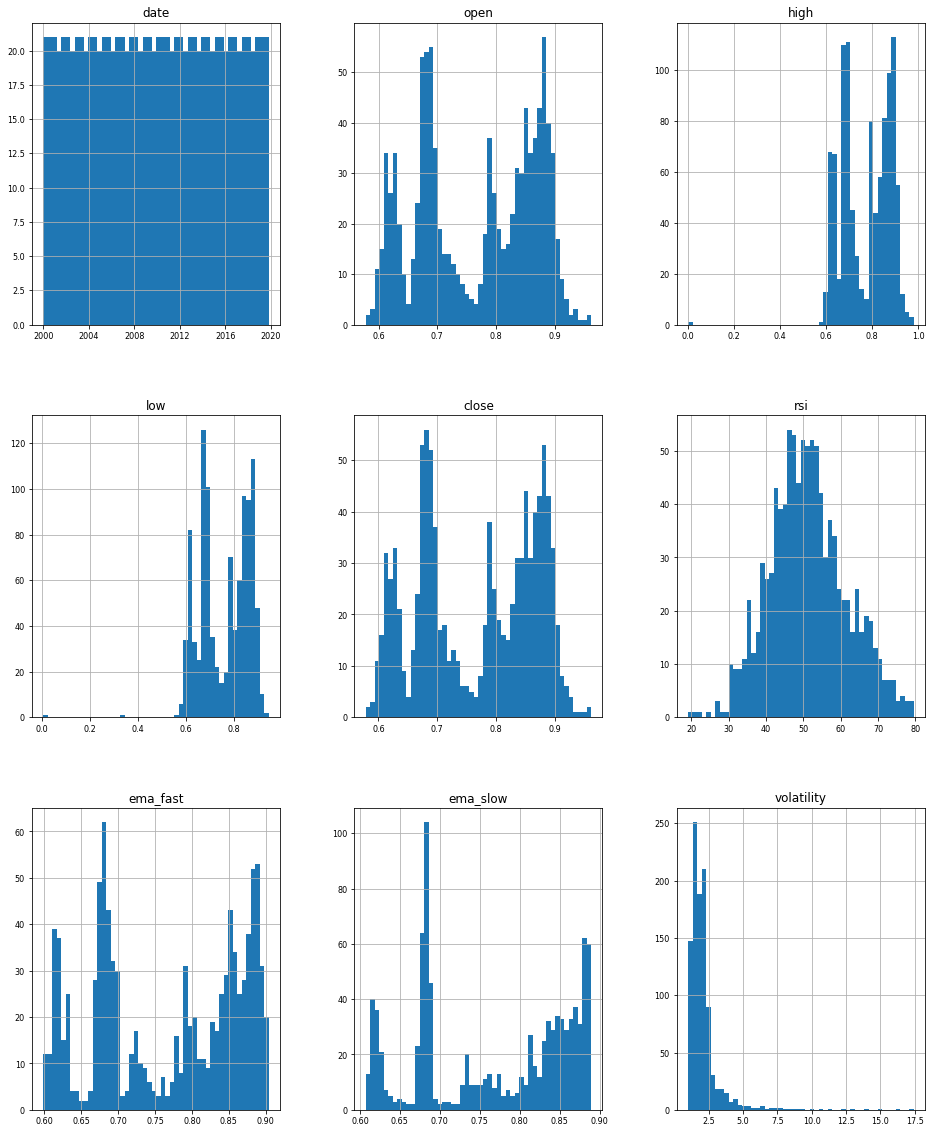

In [40]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

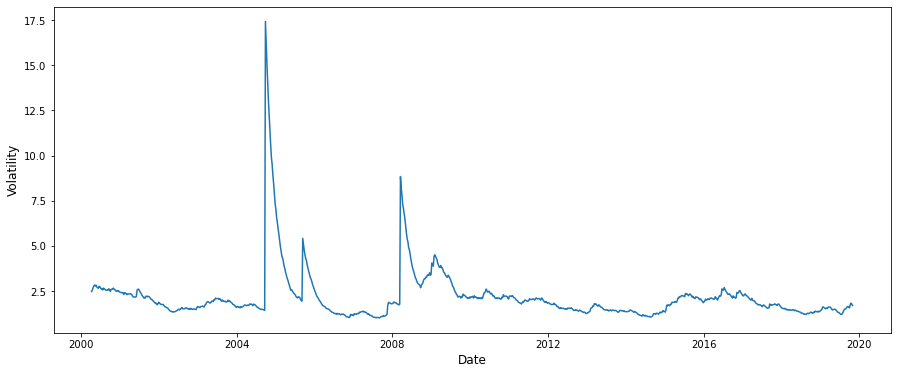

In [41]:
x = df['date']
y = df['volatility']
fig = plt.figure(figsize=(15,6))
# Rotate the date ticks on the x-axis by degrees
# plt.xticks(rotation=90)
# Set title on the axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
# Plot the data
plt.plot(x,y)

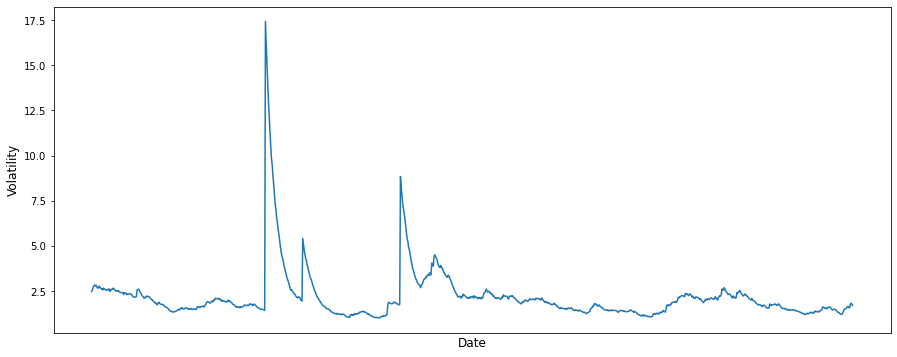

In [42]:
x = df['date']
y = df['volatility']
fig = plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(df), 5))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.plot(x,y)

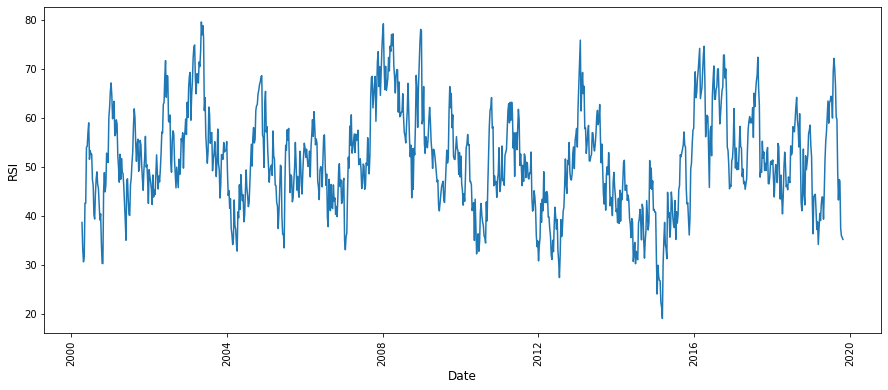

In [43]:
x = df['date']
y = df['rsi']
fig = plt.figure(figsize=(15,6))
# Rotate the date ticks on the x-axis by degrees
plt.xticks(rotation=90)
# Set title on the axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('RSI', fontsize=12)
# Plot the data
plt.plot(x,y)

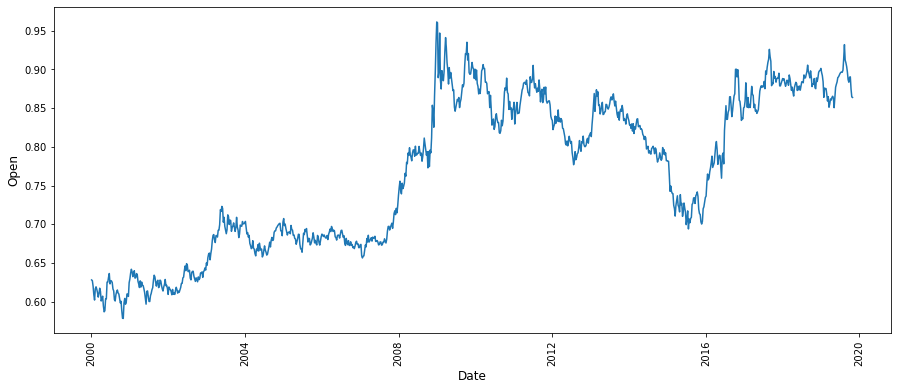

In [44]:
x = df['date']
y = df['open']
fig = plt.figure(figsize=(15,6))
# Rotate the date ticks on the x-axis by degrees
plt.xticks(rotation=90)
# Set title on the axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('Open', fontsize=12)
# Plot the data
plt.plot(x,y)

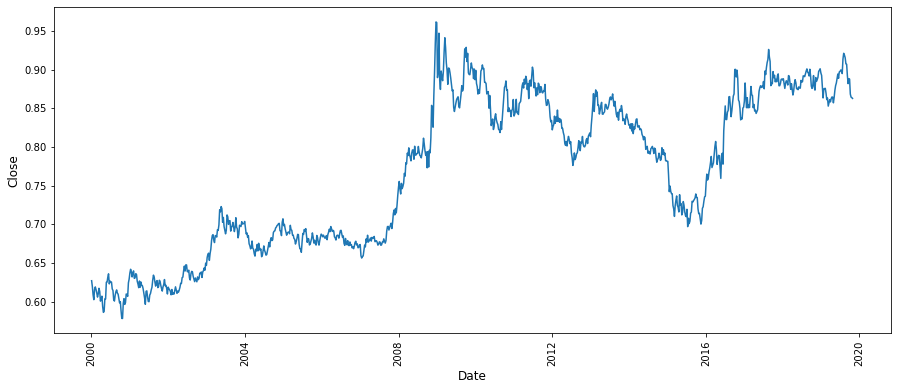

In [45]:
x = df['date']
y = df['close']
fig = plt.figure(figsize=(15,6))
# Rotate the date ticks on the x-axis by degrees
plt.xticks(rotation=90)
# Set title on the axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close', fontsize=12)
# Plot the data
plt.plot(x,y)

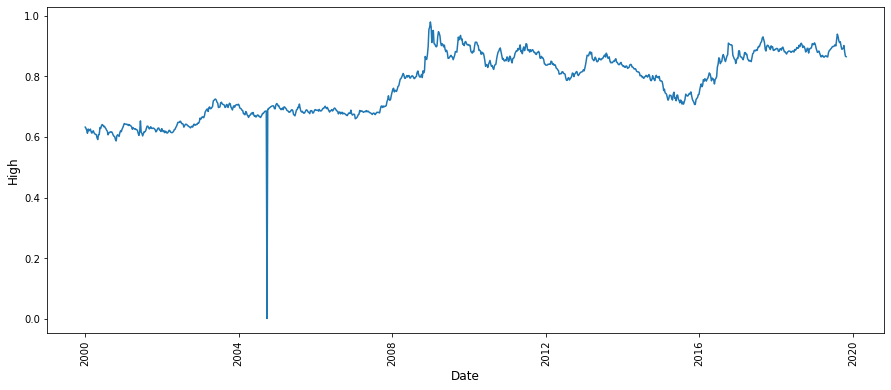

In [46]:
x = df['date']
y = df['high']
fig = plt.figure(figsize=(15,6))
# Rotate the date ticks on the x-axis by degrees
plt.xticks(rotation=90)
# Set title on the axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('High', fontsize=12)
# Plot the data
plt.plot(x,y)

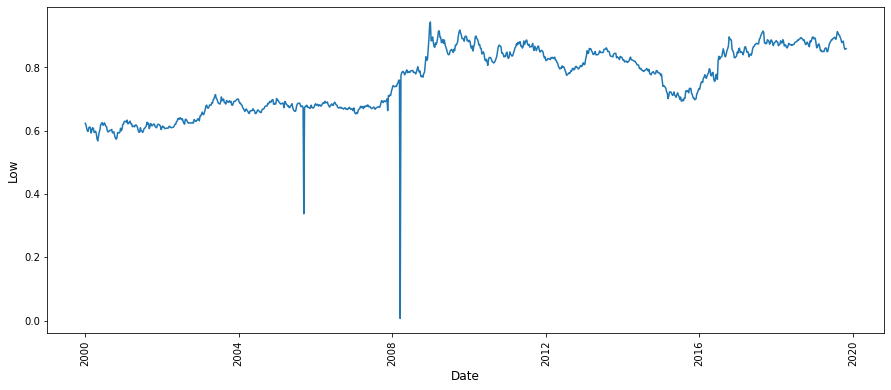

In [47]:
x = df['date']
y = df['low']
fig = plt.figure(figsize=(15,6))
# Rotate the date ticks on the x-axis by degrees
plt.xticks(rotation=90)
# Set title on the axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('Low', fontsize=12)
# Plot the data
plt.plot(x,y)

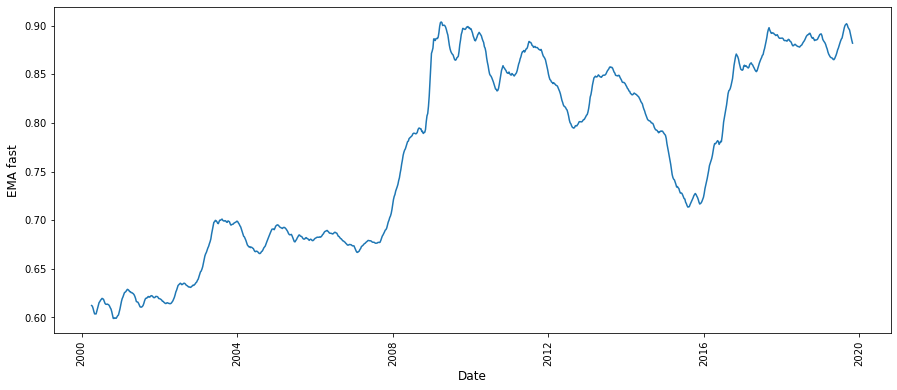

In [48]:
x = df['date']
y = df['ema_fast']
fig = plt.figure(figsize=(15,6))
# Rotate the date ticks on the x-axis by degrees
plt.xticks(rotation=90)
# Set title on the axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('EMA fast', fontsize=12)
# Plot the data
plt.plot(x,y)

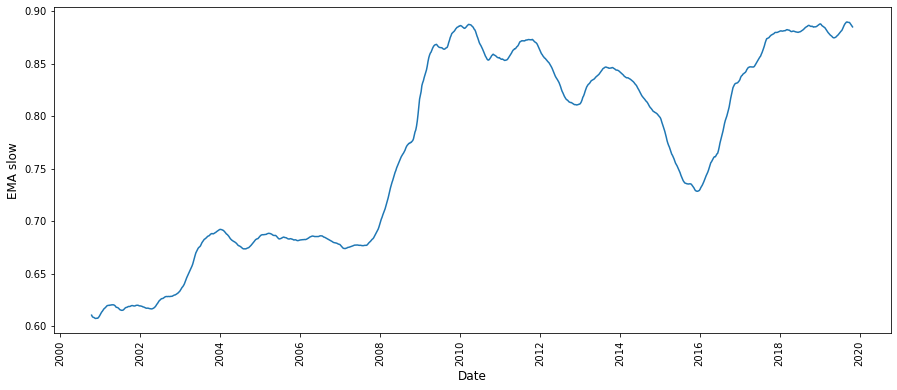

In [49]:
x = df['date']
y = df['ema_slow']
fig = plt.figure(figsize=(15,6))
# Rotate the date ticks on the x-axis by degrees
plt.xticks(rotation=90)
# Set title on the axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('EMA slow', fontsize=12)
# Plot the data
plt.plot(x,y)

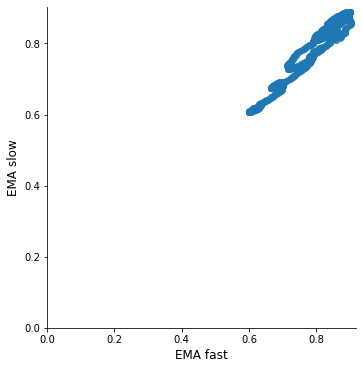

In [50]:
# new scatter plot with sensible axes limits
# Plot using Seaborn
sns.lmplot(x='ema_fast', y='ema_slow', data=df,
           fit_reg=False)

# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

plt.xlabel('EMA fast', fontsize=12)
plt.ylabel('EMA slow', fontsize=12)

plt.show()

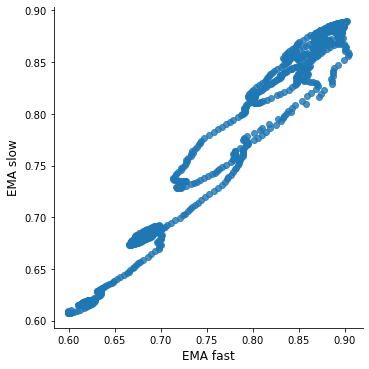

In [51]:
# new scatter plot with sensible axes limits
# Plot using Seaborn
sns.lmplot(x='ema_fast', y='ema_slow', data=df,
           fit_reg=False)

plt.xlabel('EMA fast', fontsize=12)
plt.ylabel('EMA slow', fontsize=12)

plt.show()

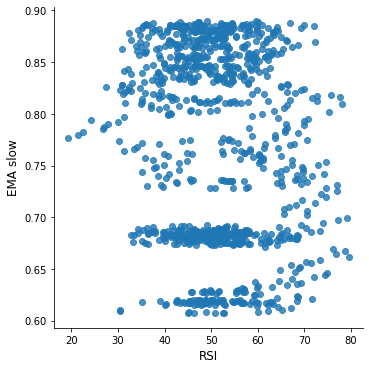

In [52]:
# new scatter plot with sensible axes limits
# Plot using Seaborn
sns.lmplot(x='rsi', y='ema_slow', data=df,
           fit_reg=False)

plt.xlabel('RSI', fontsize=12)
plt.ylabel('EMA slow', fontsize=12)

plt.show()

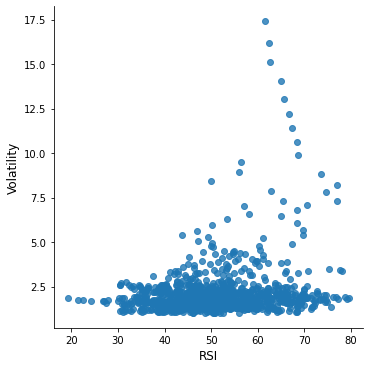

In [53]:
# new scatter plot with sensible axes limits
# Plot using Seaborn
sns.lmplot(x='rsi', y='volatility', data=df,
           fit_reg=False)

plt.xlabel('RSI', fontsize=12)
plt.ylabel('Volatility', fontsize=12)

plt.show()

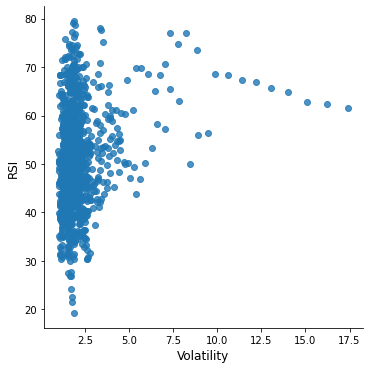

In [54]:
# new scatter plot with sensible axes limits
# Plot using Seaborn
sns.lmplot(x='volatility', y='rsi', data=df,
           fit_reg=False)

plt.xlabel('Volatility', fontsize=12)
plt.ylabel('RSI', fontsize=12)

plt.show()

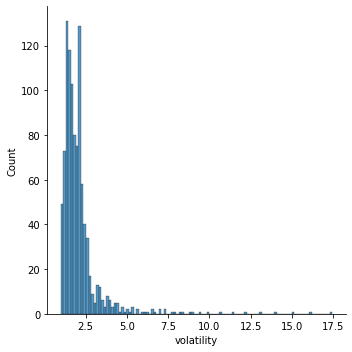

In [55]:
sns.displot(df['volatility'])

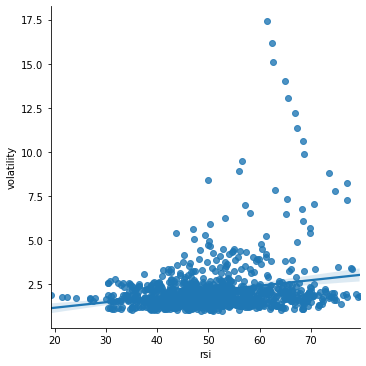

In [56]:
# making a scatter plot using the lmplot() function.
sns.lmplot(x='rsi', y='volatility', data=df)
#straightline = regression line

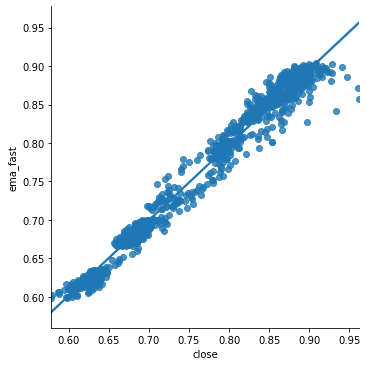

In [57]:
# making a scatter plot using the lmplot() function.
sns.lmplot(x='close', y='ema_fast', data=df)
#straightline = regression line

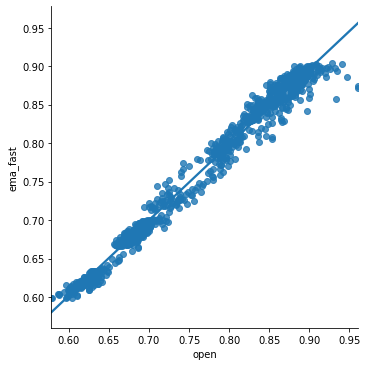

In [58]:
# making a scatter plot using the lmplot() function.
sns.lmplot(x='open', y='ema_fast', data=df)
#straightline = regression line

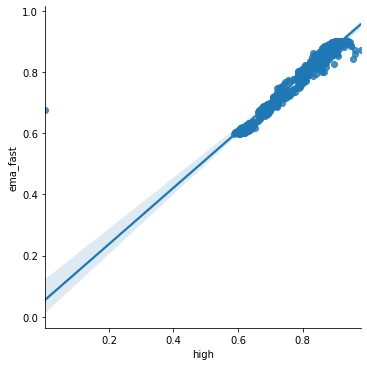

In [59]:
# making a scatter plot using the lmplot() function.
sns.lmplot(x='high', y='ema_fast', data=df)
#straightline = regression line

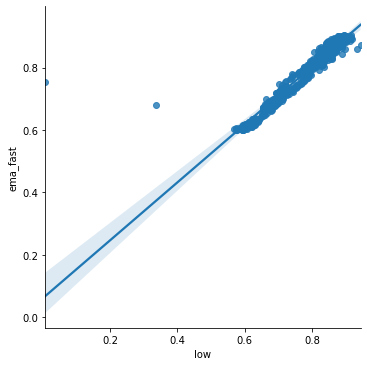

In [60]:
# making a scatter plot using the lmplot() function.
sns.lmplot(x='low', y='ema_fast', data=df)
#straightline = regression line

<AxesSubplot:>

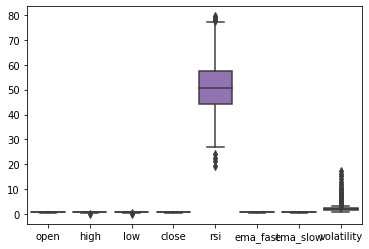

In [61]:
sns.boxplot(data=df)

<AxesSubplot:>

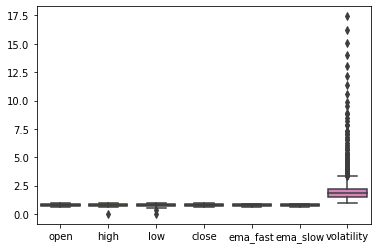

In [62]:
df_withoutrsi = df.drop(['rsi'],axis=1)
sns.boxplot(data=df_withoutrsi)

<AxesSubplot:>

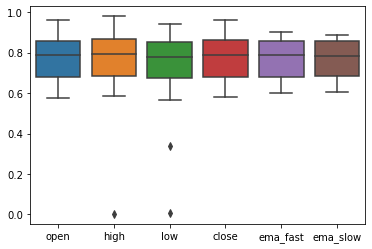

In [63]:
df_withoutvol = df_withoutrsi.drop(['volatility'],axis=1)
sns.boxplot(data=df_withoutvol)

## Correlation and heatmap

In [64]:
# check dataset correlation
df.corr()

,open,high,low,close,rsi,ema_fast,ema_slow,volatility
open,1.000000,0.976303,0.964800,0.995589,0.078690,0.991586,0.967910,-0.076266
high,0.976303,1.000000,0.942753,0.975973,0.091654,0.967763,0.940872,-0.136056
low,0.964800,0.942753,1.000000,0.964937,0.071655,0.959598,0.938034,-0.120510
close,0.995589,0.975973,0.964937,1.000000,0.110976,0.989206,0.964847,-0.075087
rsi,0.078690,0.091654,0.071655,0.110976,1.000000,-0.017447,-0.152074,0.216547
ema_fast,0.991586,0.967763,0.959598,0.989206,-0.017447,1.000000,0.988176,-0.096615
ema_slow,0.967910,0.940872,0.938034,0.964847,-0.152074,0.988176,1.000000,-0.128484
volatility,-0.076266,-0.136056,-0.120510,-0.075087,0.216547,-0.096615,-0.128484,1.000000


- volatility (intensity of changes) has its highest correlation with rsi (strength of the price): 0.21
- rsi also but a certain correlation is also seen with the variable close (the price of the pair at the end of the week): 0.11
- ema's are really correlated between them and also with the variables of price during the week but apparently not with volatility and rsi (strange)
- the price variables that most affect to the rsi are the close price of the pair followed by the highest. 
- both ema fast and slow are higly correlated with open price, followed by the close price

<AxesSubplot:>

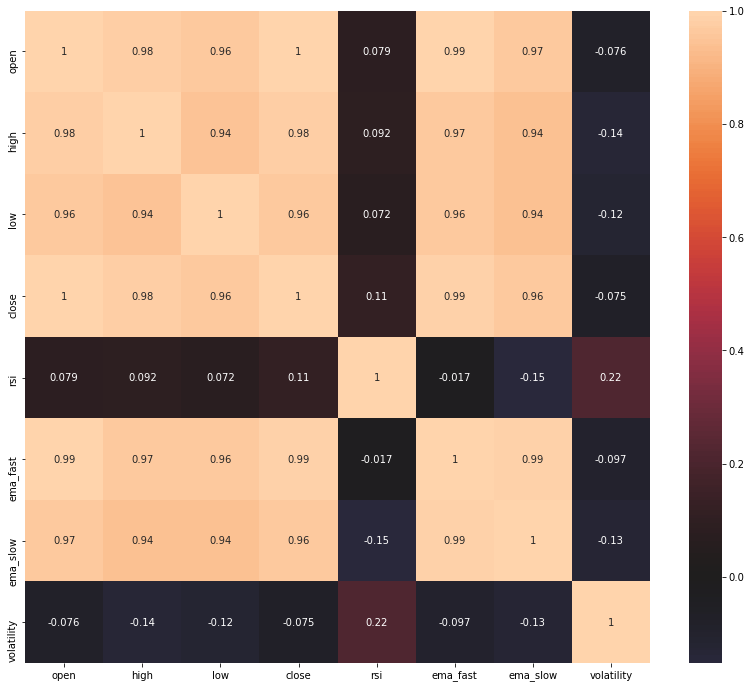

In [65]:
#let's visualise the correlations
# calculate correlations
corr = df.corr()
 
# heatmap
plt.figure(figsize=(14,12))
sns.heatmap(corr,
           center=0,
           annot=True)

Which variables affect more to the...
- open: close, followed by ema_fast
- high: open and close
- low: open, close and ema_fast
- close: open
- rsi: close
- ema_fast: ema_slow, open and close
- ema_slow: ema_fast, followed by open price
- volatility: rsi

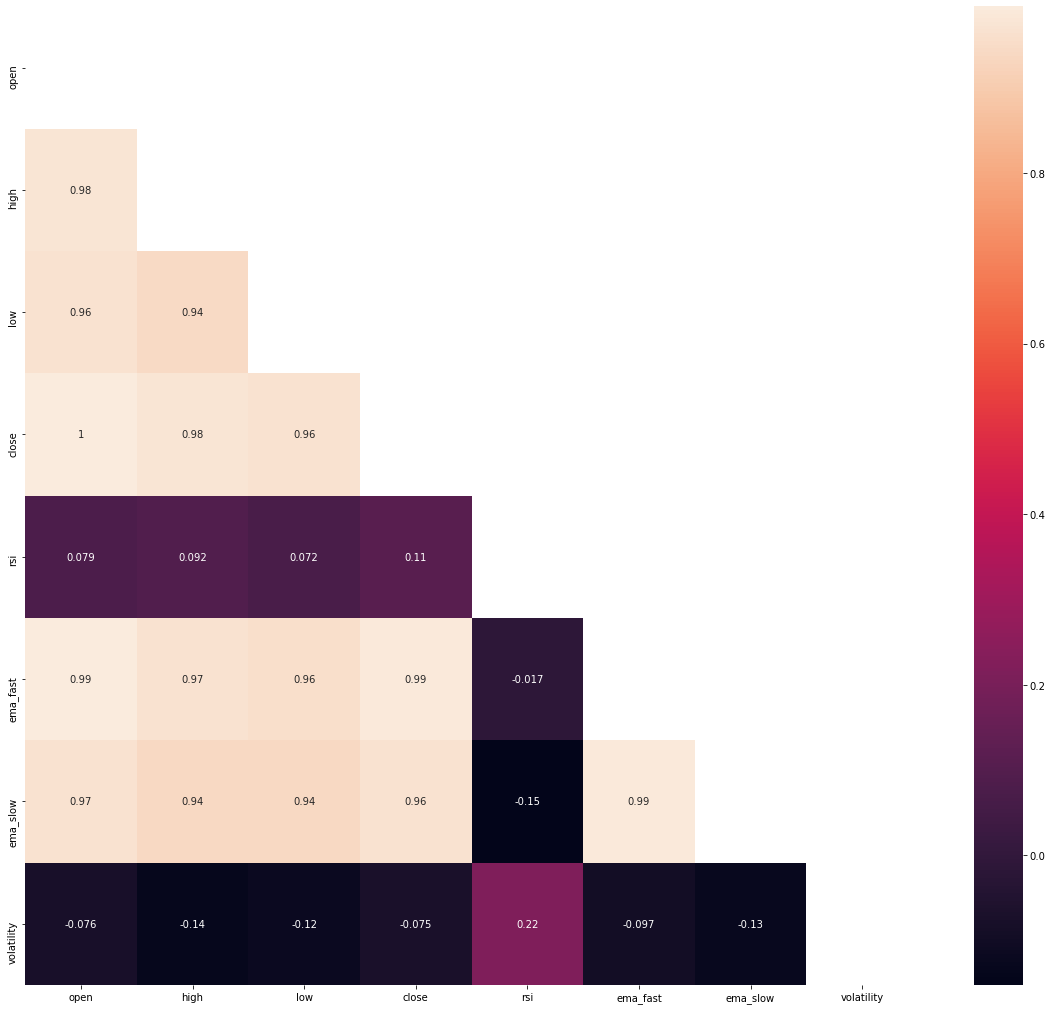

In [66]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True

fig, ax=plt.subplots(figsize=(20, 18))
ax=sns.heatmap(df.corr(), mask=mask, annot=True,)
plt.show()

Text(0, 0.5, 'Open price')

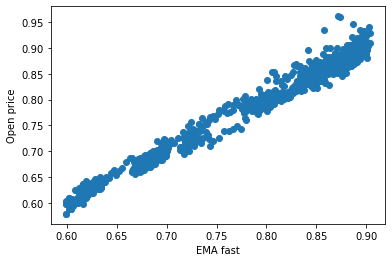

In [67]:
# correlation coefficient EMA fast x Open
plt.scatter(df['ema_fast'],df['open'])
plt.xlabel('EMA fast')
plt.ylabel('Open price')

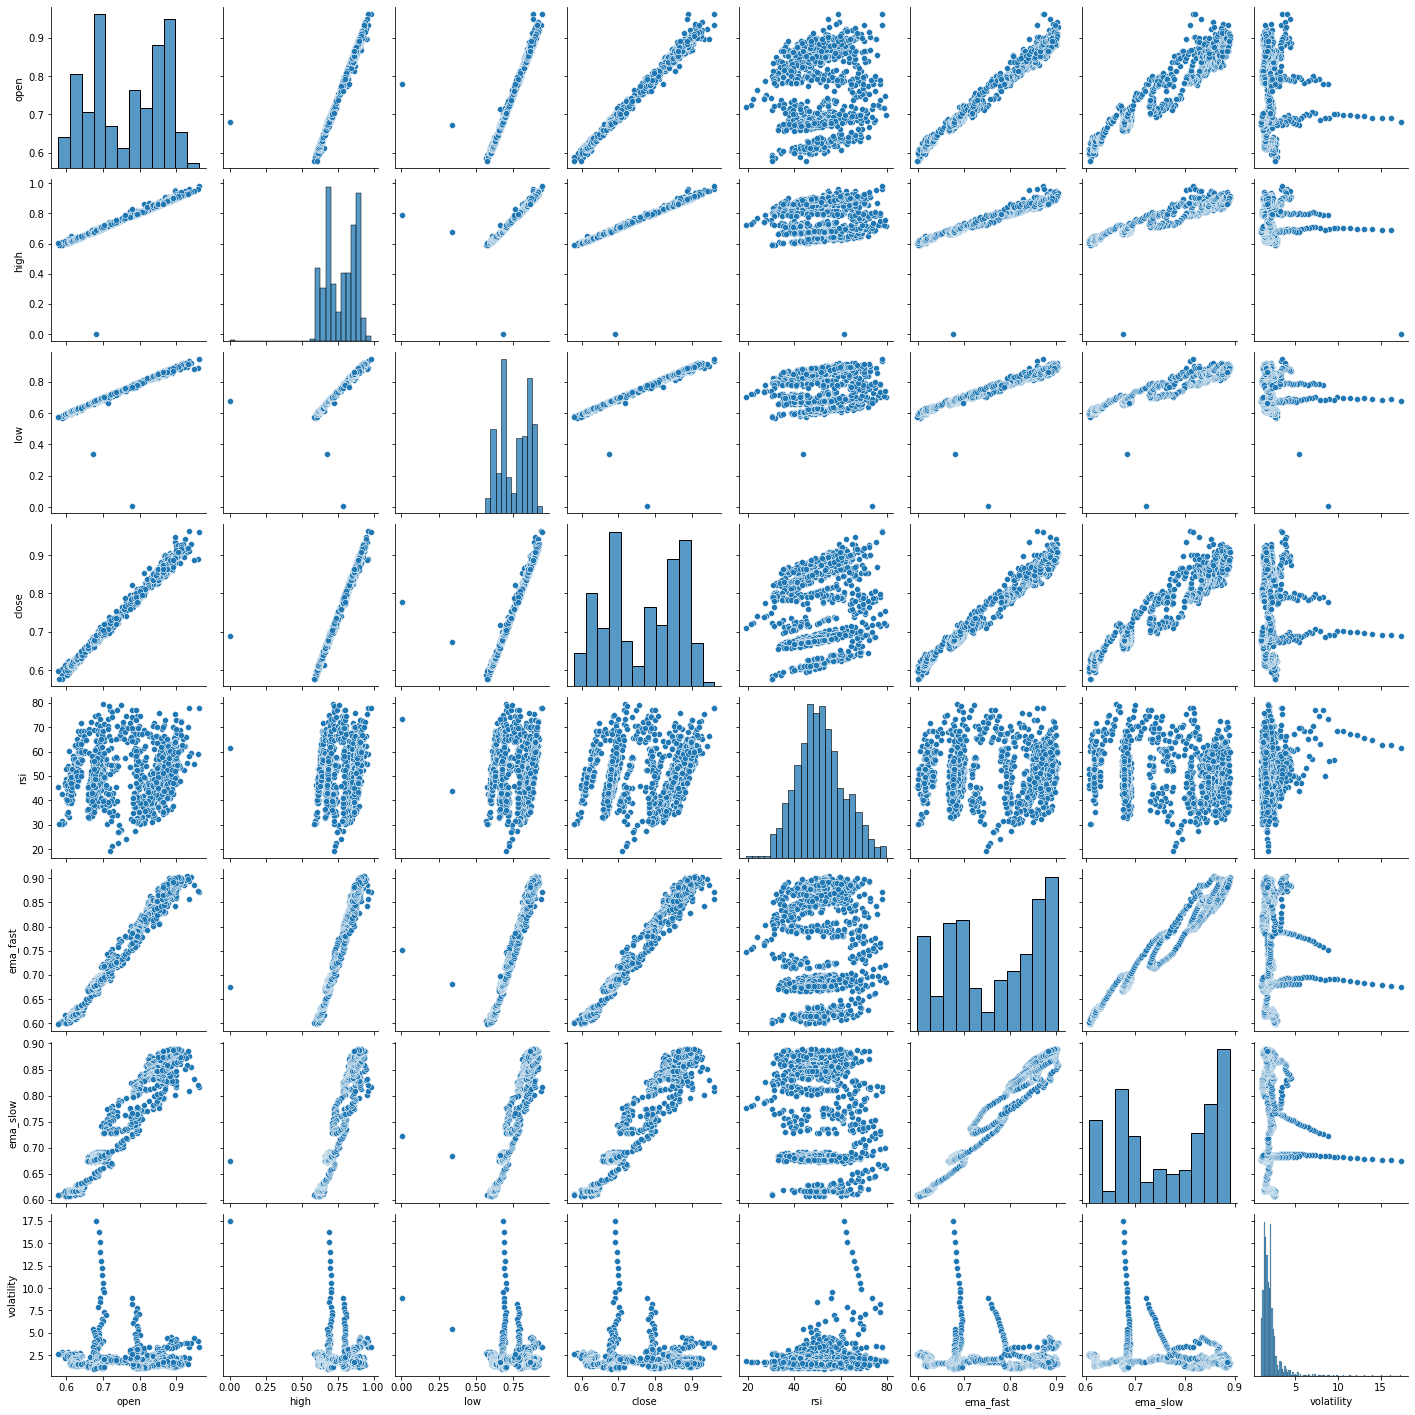

In [68]:
# all scatter plots as a matrix using pairplot
sns.pairplot(df)